# Multiple Winner-takes-all SparseDream

## Intro
* **Date**: 12/20/2020
* **What**: This is basically a sparse version of the Krotov Hopfield winner-takes-all network.  I'm basically constraining everything so that there are $N$ winners instead of just one.  Also no anti-Hebbian learning.
* **Why**: Cause I've been trying to cook up a bunch of convoluted network, and I'm simply very tired of it.  WTA is super straight-forward and easy to understand, so I can actually figure out what's working, and what isn't.  Also, this seems like just about the easiest way to get sparsity, so I'm latching on to it.  
* **Hopes**: I'm pretty sure I know what's going to happen, but I just want to be sure I'm getting the sparsity I want to see. I'm probably going to run this with mnist and maybe also cifar10.
* **Limitations**: It's kinda weird that there will always be $N$ winners.  I honestly might change that in the future.  And the other limitation is the great unknown constantly trying to eat my head off.

## Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tqdm import tqdm
from scipy.special import expit as sig

(train_x, train_y), (test_x, test_y) = mnist.load_data()

m_flat_tr = train_x.reshape(train_x.shape[0], -1) / 255.0
m_flat_te = test_x.reshape(test_x.shape[0], -1) / 255.0 

m_tr_len, m_len = m_flat_tr.shape

def draw_weights(w, Kx, Ky, s_len, fig):
    tapestry = np.zeros((s_len * Ky, s_len * Kx))
    
    w_i = 0
    for y in range(Ky):
        for x in range(Kx):
            tapestry[y * s_len: (y + 1) * s_len, x * s_len: (x + 1) * s_len] = w[w_i].reshape(s_len, s_len)
            w_i += 1
            
    plt.clf()        
    max_val = np.max(tapestry)
    im = plt.imshow(tapestry, cmap="Greys", vmax=max_val)
    fig.colorbar(im, ticks=[0, max_val])
    plt.axis("off")
    fig.canvas.draw()
    
def relu(x):
    return (abs(x) + x) / 2

<IPython.core.display.Javascript object>


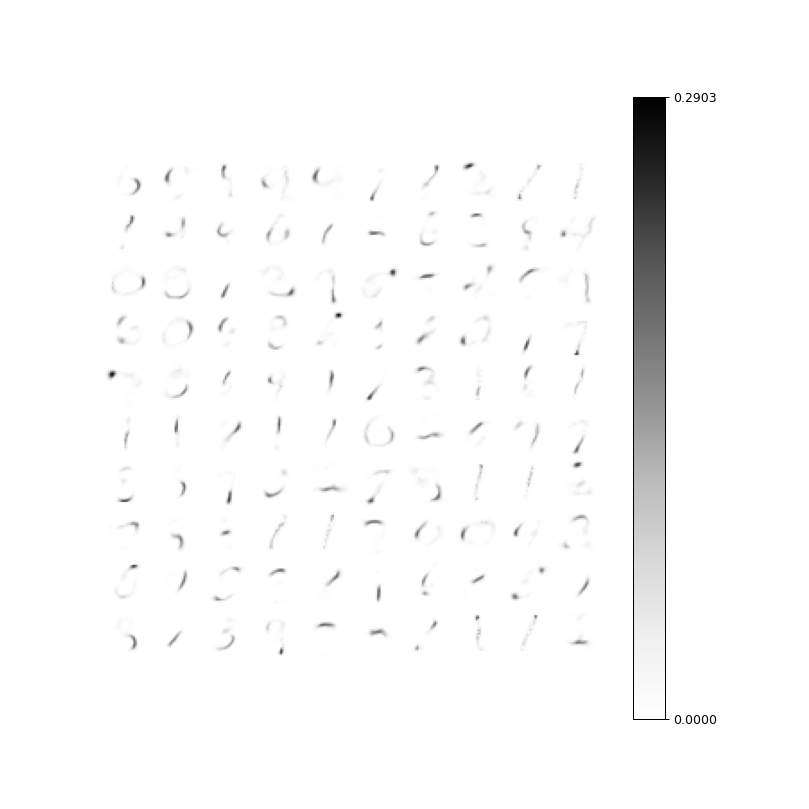

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6000/6000 [00:02<00:00, 2148.52it/s]


In [20]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))

Nep = 10
T_s = 6000

Kx = 10
Ky = 10
N = Kx * Ky
m_len = 28 * 28 
tr_len = 60000

prec = 1e-10

n_w = 10 #Number of winners

# Feedforward
w = np.random.uniform(0, 1, (N, m_len))
xi = 0.002

for ep in range(Nep):
    inputs = m_flat_tr[np.random.permutation(tr_len)]
    for i in tqdm(range(T_s)):
        v = inputs[i].reshape(-1, 1)
        p = w @ v
        winners = np.argsort(p, axis=0)[-n_w:]
        mask = np.zeros((N, 1))
        mask[winners] = 1
        o = mask * p
        r = w.T @ o
        mod_r = np.maximum(r, prec)
        e = v - r
        
        w += w * o * (e / mod_r).T * xi
        
    draw_weights(w, Kx, Ky, 28, fig)

Well fam, that is super dope, and there's really no other way to put it.  What's super awesome is that even though I'm using 10 winners, clearly they are not all being used.  I'm going to do a couple reconstructions, and then play with this a bit more.

<IPython.core.display.Javascript object>


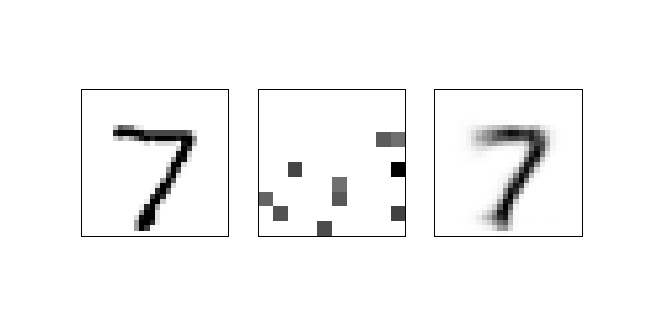

In [37]:
img_i = 0

s_len = 28

img = m_flat_te[img_i]

v = img.reshape(-1, 1)
p = w @ v
winners = np.argsort(p, axis=0)[-n_w:]
mask = np.zeros((N, 1))
mask[winners] = 1
o = mask * p
r = w.T @ o

plt.figure(figsize=(8, 4))

plt.subplot(1, 3, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(img.reshape(s_len, s_len), cmap="Greys")

plt.subplot(1, 3, 2)
plt.xticks([])
plt.yticks([])
plt.imshow(o.reshape(10, 10), cmap="Greys")

plt.subplot(1, 3, 3)
plt.xticks([])
plt.yticks([])
plt.imshow(r.reshape(s_len, s_len), cmap="Greys", vmax=1)

plt.show()

<IPython.core.display.Javascript object>


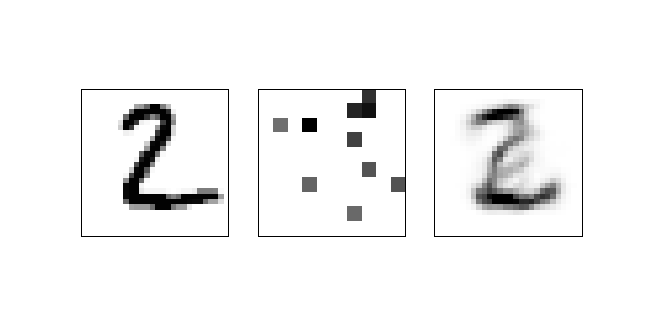

In [32]:
img_i = 1

s_len = 28

img = m_flat_te[img_i]

v = img.reshape(-1, 1)
p = w @ v
winners = np.argsort(p, axis=0)[-n_w:]
mask = np.zeros((N, 1))
mask[winners] = 1
o = mask * p
r = w.T @ o

plt.figure(figsize=(8, 4))

plt.subplot(1, 3, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(img.reshape(s_len, s_len), cmap="Greys")

plt.subplot(1, 3, 2)
plt.xticks([])
plt.yticks([])
plt.imshow(o.reshape(10, 10), cmap="Greys")

plt.subplot(1, 3, 3)
plt.xticks([])
plt.yticks([])
plt.imshow(r.reshape(s_len, s_len), cmap="Greys", vmax=1)

plt.show()

<IPython.core.display.Javascript object>


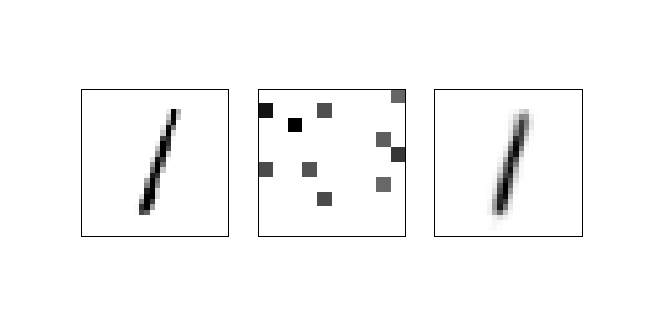

In [25]:
img_i = 2

s_len = 28

img = m_flat_te[img_i]

v = img.reshape(-1, 1)
p = w @ v
winners = np.argsort(p, axis=0)[-n_w:]
mask = np.zeros((N, 1))
mask[winners] = 1
o = mask * p
r = w.T @ o

plt.figure(figsize=(8, 4))

plt.subplot(1, 3, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(img.reshape(s_len, s_len), cmap="Greys")

plt.subplot(1, 3, 2)
plt.xticks([])
plt.yticks([])
plt.imshow(o.reshape(10, 10), cmap="Greys")

plt.subplot(1, 3, 3)
plt.xticks([])
plt.yticks([])
plt.imshow(r.reshape(s_len, s_len), cmap="Greys", vmax=1)

plt.show()

<IPython.core.display.Javascript object>


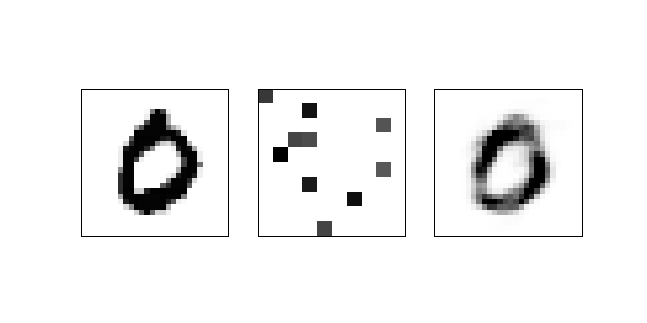

In [30]:
img_i = 3

s_len = 28

img = m_flat_te[img_i]

v = img.reshape(-1, 1)
p = w @ v
winners = np.argsort(p, axis=0)[-n_w:]
mask = np.zeros((N, 1))
mask[winners] = 1
o = mask * p
r = w.T @ o

plt.figure(figsize=(8, 4))

plt.subplot(1, 3, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(img.reshape(s_len, s_len), cmap="Greys")

plt.subplot(1, 3, 2)
plt.xticks([])
plt.yticks([])
plt.imshow(o.reshape(10, 10), cmap="Greys")

plt.subplot(1, 3, 3)
plt.xticks([])
plt.yticks([])
plt.imshow(r.reshape(s_len, s_len), cmap="Greys", vmax=1)

plt.show()

<IPython.core.display.Javascript object>


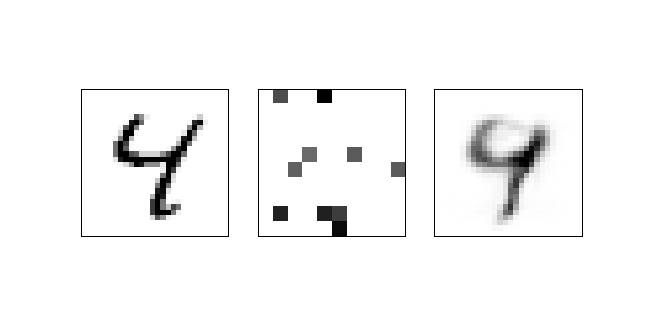

In [39]:
img_i = 6

s_len = 28

img = m_flat_te[img_i]

v = img.reshape(-1, 1)
p = w @ v
winners = np.argsort(p, axis=0)[-n_w:]
mask = np.zeros((N, 1))
mask[winners] = 1
o = mask * p
r = w.T @ o

plt.figure(figsize=(8, 4))

plt.subplot(1, 3, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(img.reshape(s_len, s_len), cmap="Greys", vmax=1)

plt.subplot(1, 3, 2)
plt.xticks([])
plt.yticks([])
plt.imshow(o.reshape(10, 10), cmap="Greys")

plt.subplot(1, 3, 3)
plt.xticks([])
plt.yticks([])
plt.imshow(r.reshape(s_len, s_len), cmap="Greys", vmax=1)

plt.show()

<IPython.core.display.Javascript object>


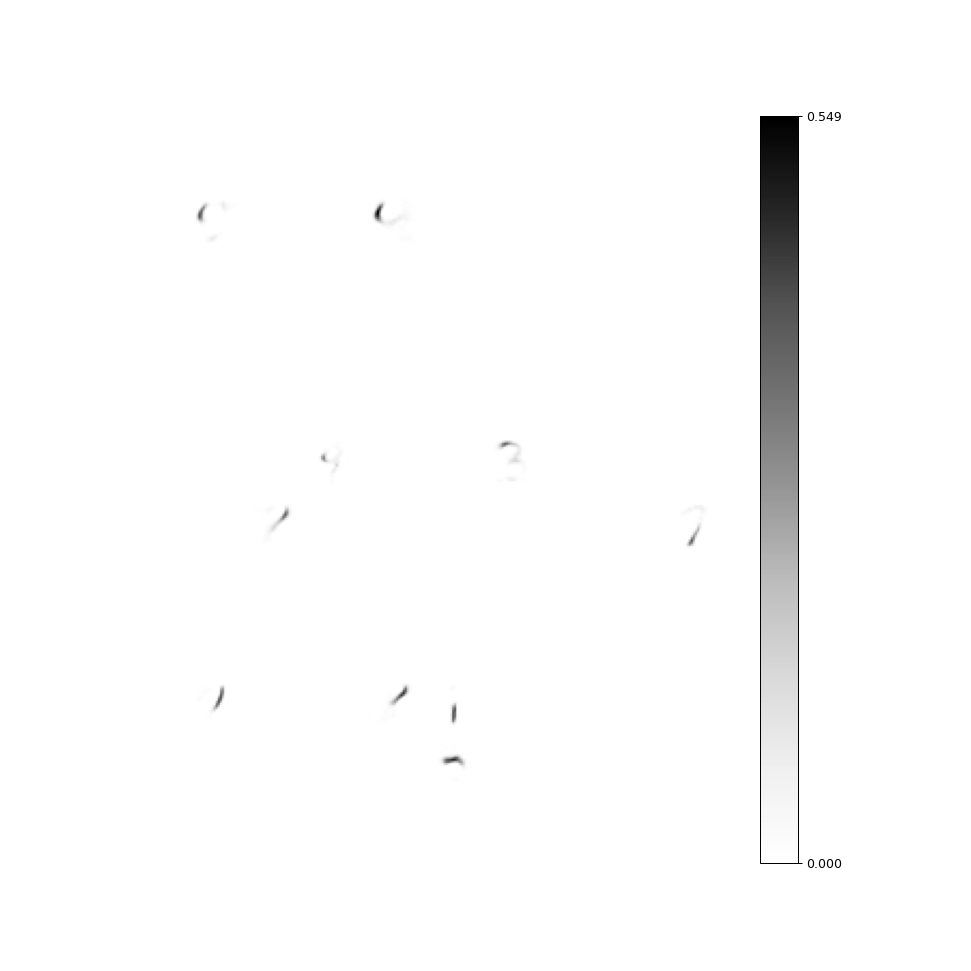

In [40]:
fig = plt.figure(figsize=(12, 12))

tapestry = np.zeros((s_len * Ky, s_len * Kx))

w_i = 0
for y in range(Ky):
    for x in range(Kx):
        tapestry[y * s_len: (y + 1) * s_len, x * s_len: (x + 1) * s_len] = w[w_i].reshape(s_len, s_len) * o[w_i] 
        w_i += 1

plt.clf()        
max_val = np.max(tapestry)
im = plt.imshow(tapestry, cmap="Greys", vmax=max_val)
fig.colorbar(im, ticks=[0, max_val])
plt.axis("off")
fig.canvas.draw()

Wow, the reconstructions are pretty darn good!  That's good to see!  Also I rigged up the above figure so you can really see the features that are being used for the reconstructions.  

I also noticed that the output is frequently greater that zero, so I think I'm going to slap a tanh over the output and call that good.

Ok, I'm going to play around a bit more with everything, and see what I can find.

Also, I think I was wrong.  It looks like the network is basically using all the winners it can get after all.  That might be a problem at some point, but not right now.

<IPython.core.display.Javascript object>


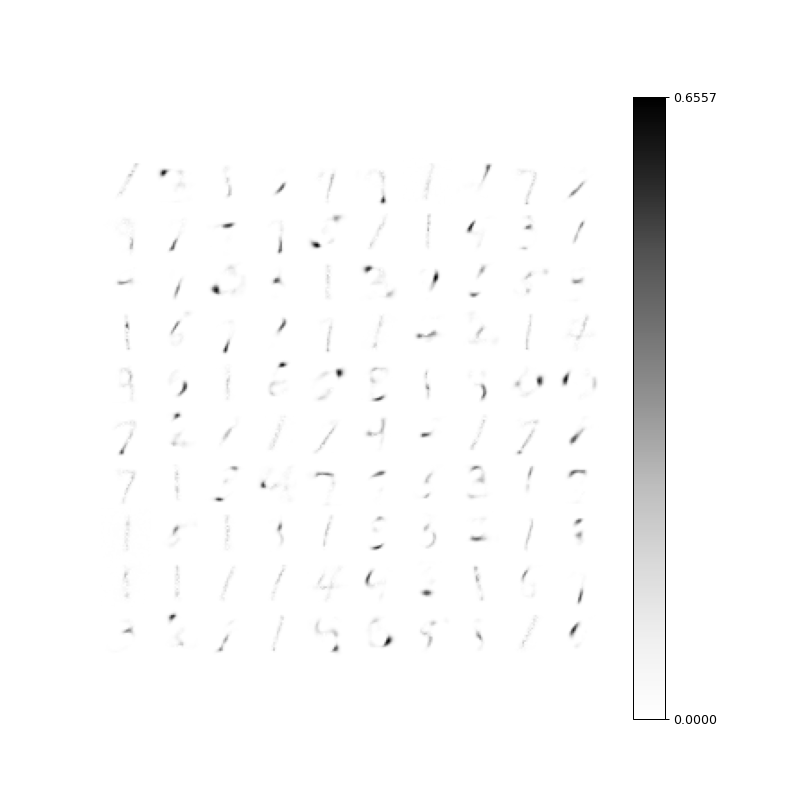

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6000/6000 [00:02<00:00, 2105.92it/s]


In [46]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))

Nep = 10
T_s = 6000

Kx = 10
Ky = 10
N = Kx * Ky
m_len = 28 * 28 
tr_len = 60000

prec = 1e-10

n_w = 10 #Number of winners

# Feedforward
w = np.random.uniform(0, 1, (N, m_len))
xi = 0.004

for ep in range(Nep):
    inputs = m_flat_tr[np.random.permutation(tr_len)]
    for i in tqdm(range(T_s)):
        v = inputs[i].reshape(-1, 1)
        p = w @ v
        winners = np.argsort(p, axis=0)[-n_w:]
        mask = np.zeros((N, 1))
        mask[winners] = 1
        o = np.tanh(mask * p)
        r = w.T @ o
        mod_r = np.maximum(r, prec)
        e = v - r
        
        w += w * o * (e / mod_r).T * xi
        
    draw_weights(w, Kx, Ky, 28, fig)

In [55]:
def reconstruct(img_i, w):
    s_len = 28

    img = m_flat_te[img_i]

    v = img.reshape(-1, 1)
    p = w @ v
    winners = np.argsort(p, axis=0)[-n_w:]
    mask = np.zeros((N, 1))
    mask[winners] = 1
    o = np.tanh(mask * p)
    r = w.T @ o

    plt.figure(figsize=(8, 4))

    plt.subplot(1, 3, 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape(s_len, s_len), cmap="Greys", vmax=1)

    plt.subplot(1, 3, 2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(o.reshape(10, 10), cmap="Greys")

    plt.subplot(1, 3, 3)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(r.reshape(s_len, s_len), cmap="Greys", vmax=1)

    plt.show()

<IPython.core.display.Javascript object>


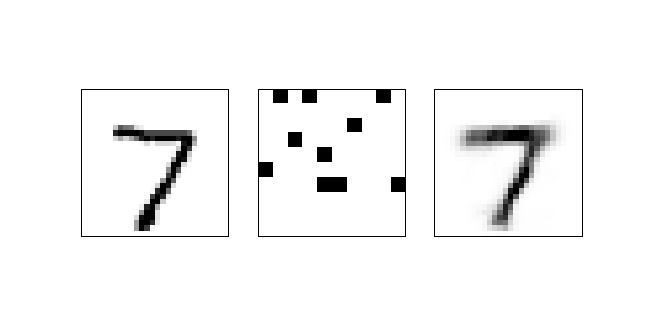

<IPython.core.display.Javascript object>


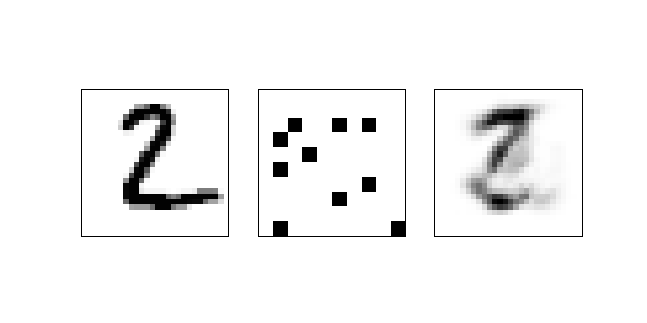

<IPython.core.display.Javascript object>


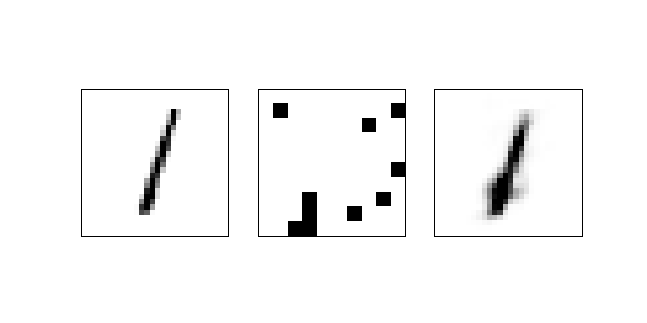

<IPython.core.display.Javascript object>


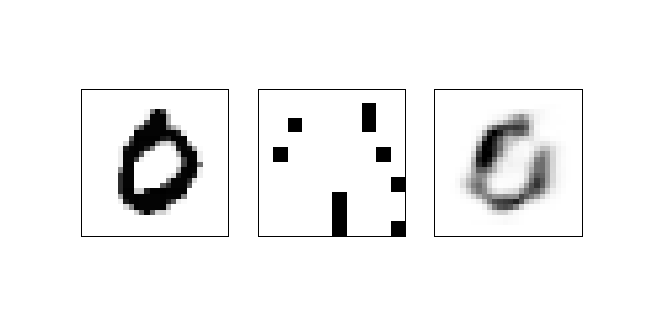

<IPython.core.display.Javascript object>


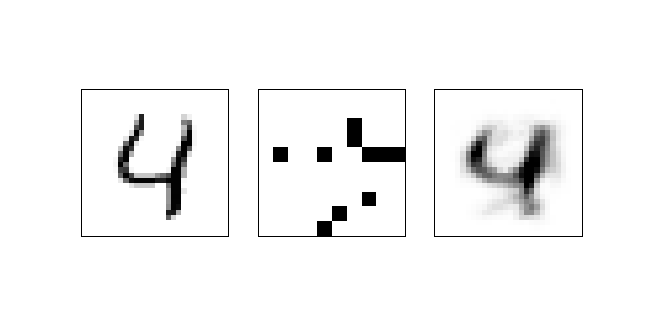

<IPython.core.display.Javascript object>


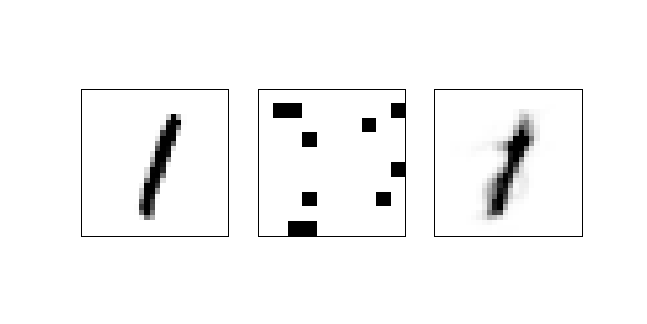

<IPython.core.display.Javascript object>


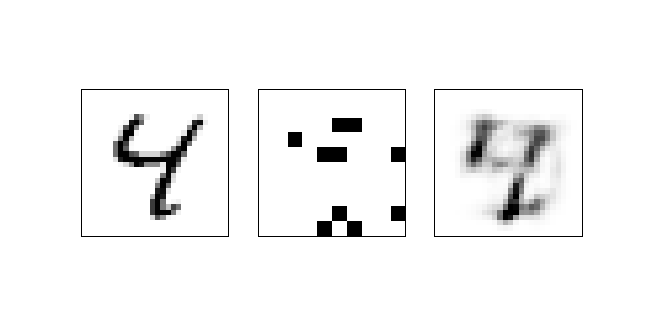

<IPython.core.display.Javascript object>


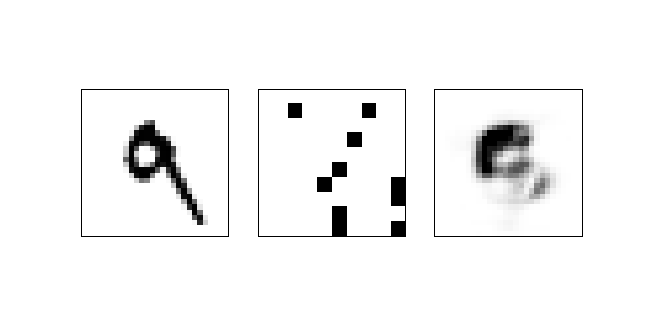

<IPython.core.display.Javascript object>


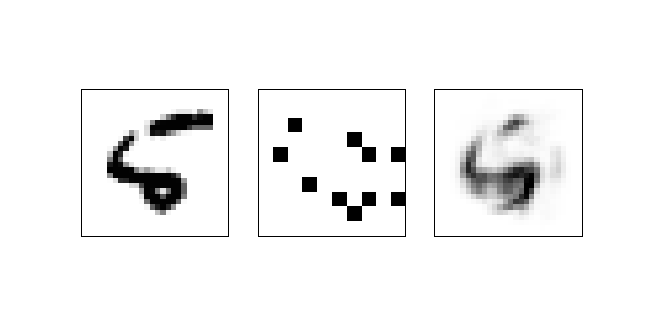

<IPython.core.display.Javascript object>


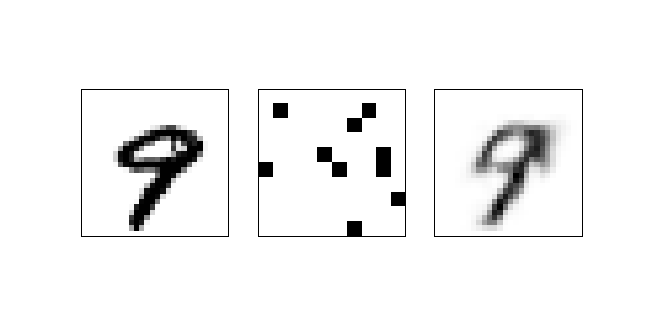

In [56]:
for i in range(10):
    reconstruct(i, w)

Wow, for some reason, it seems like when I didn't use tanh, everything was a lot better.  

Maybe I'll just do linear, with a max of 1.  Let's see how that does.

<IPython.core.display.Javascript object>


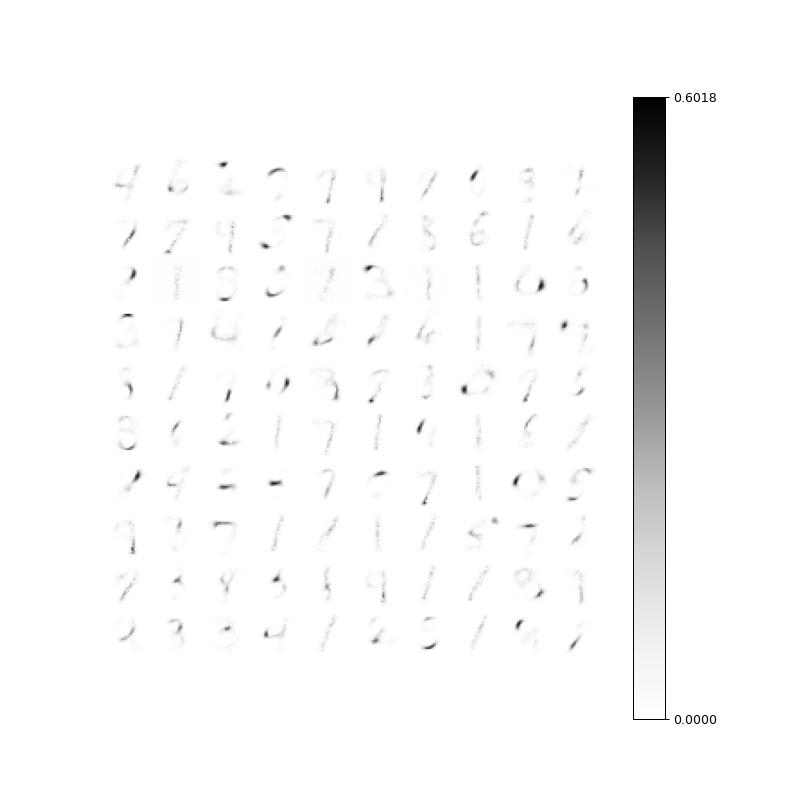

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6000/6000 [00:02<00:00, 2109.72it/s]


In [58]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))

Nep = 10
T_s = 6000

Kx = 10
Ky = 10
N = Kx * Ky
m_len = 28 * 28 
tr_len = 60000

prec = 1e-10

n_w = 10 #Number of winners

# Feedforward
w = np.random.uniform(0, 1, (N, m_len))
xi = 0.002

for ep in range(Nep):
    inputs = m_flat_tr[np.random.permutation(tr_len)]
    for i in tqdm(range(T_s)):
        v = inputs[i].reshape(-1, 1)
        p = w @ v
        winners = np.argsort(p, axis=0)[-n_w:]
        mask = np.zeros((N, 1))
        mask[winners] = 1
        o = np.minimum(mask * p, 1)
        r = w.T @ o
        mod_r = np.maximum(r, prec)
        e = v - r
        
        w += w * o * (e / mod_r).T * xi
        
    draw_weights(w, Kx, Ky, 28, fig)

In [59]:
def reconstruct(img_i, w):
    s_len = 28

    img = m_flat_te[img_i]

    v = img.reshape(-1, 1)
    p = w @ v
    winners = np.argsort(p, axis=0)[-n_w:]
    mask = np.zeros((N, 1))
    mask[winners] = 1
    o = np.minimum(mask * p, 1)
    r = w.T @ o

    plt.figure(figsize=(8, 4))

    plt.subplot(1, 3, 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape(s_len, s_len), cmap="Greys", vmax=1)

    plt.subplot(1, 3, 2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(o.reshape(10, 10), cmap="Greys")

    plt.subplot(1, 3, 3)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(r.reshape(s_len, s_len), cmap="Greys", vmax=1)

    plt.show()

<IPython.core.display.Javascript object>


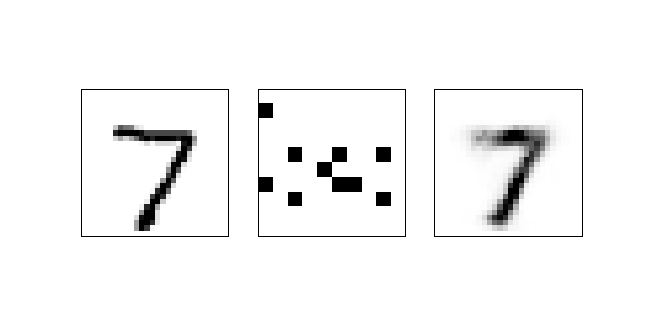

<IPython.core.display.Javascript object>


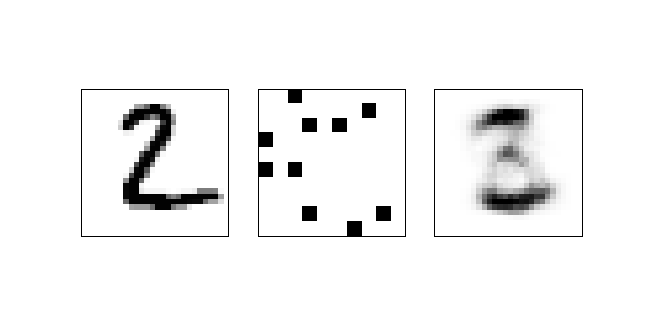

<IPython.core.display.Javascript object>


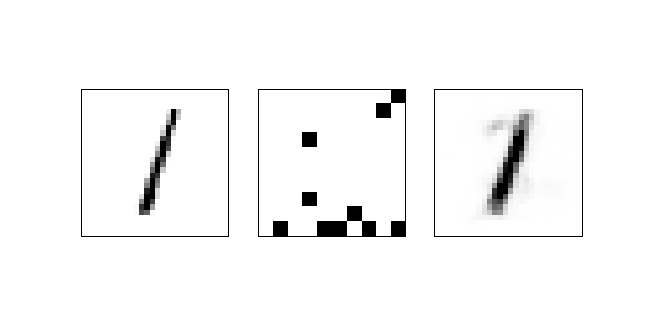

<IPython.core.display.Javascript object>


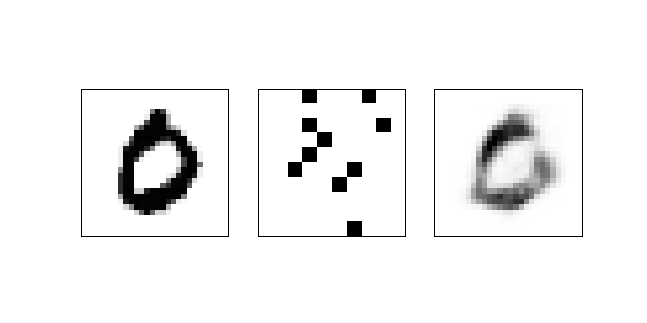

<IPython.core.display.Javascript object>


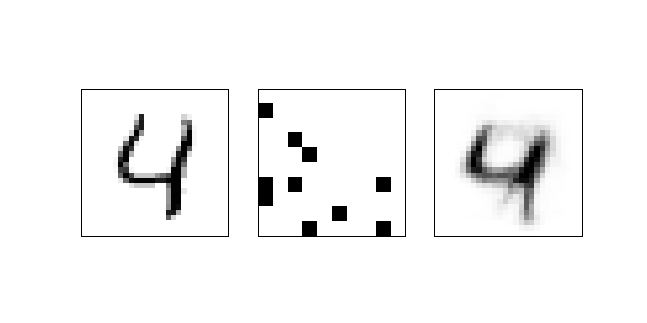

<IPython.core.display.Javascript object>


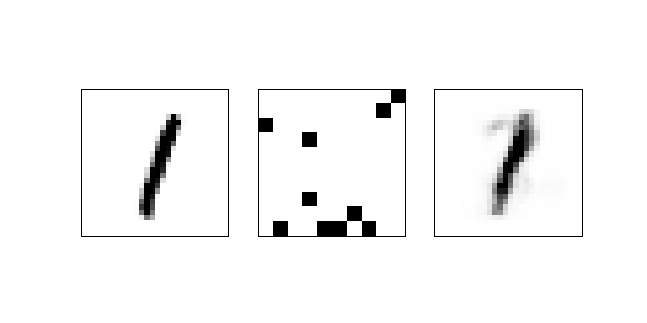

<IPython.core.display.Javascript object>


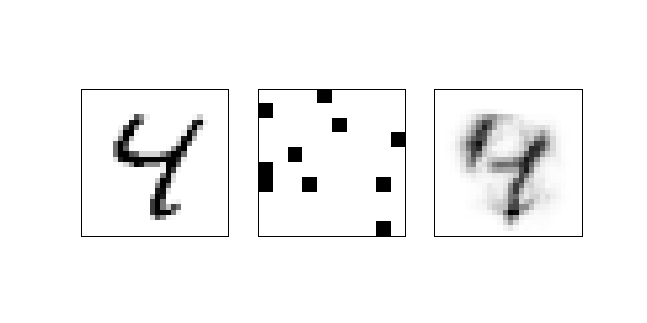

<IPython.core.display.Javascript object>


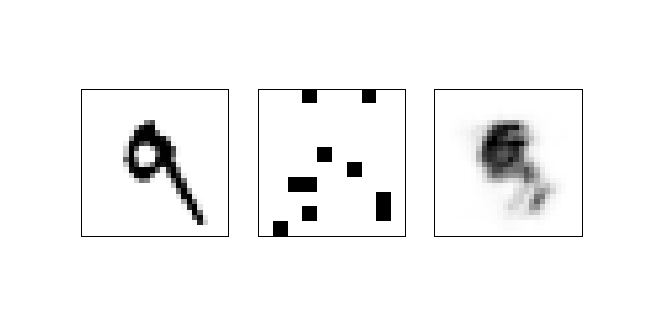

<IPython.core.display.Javascript object>


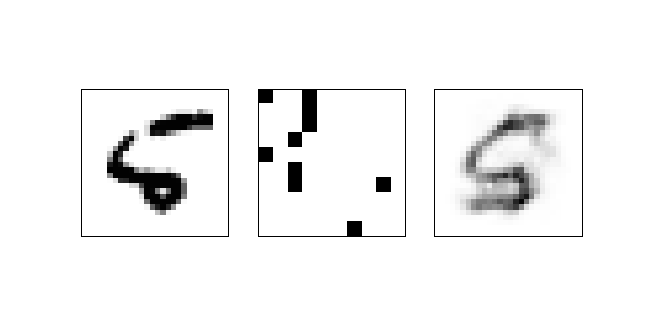

<IPython.core.display.Javascript object>


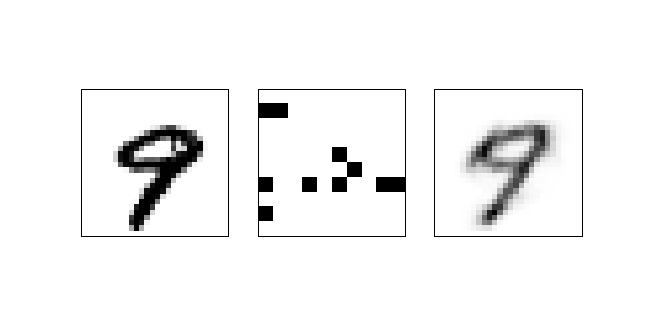

In [60]:
for i in range(10):
    reconstruct(i, w)

Weird.  I'm going to try 400.

<IPython.core.display.Javascript object>


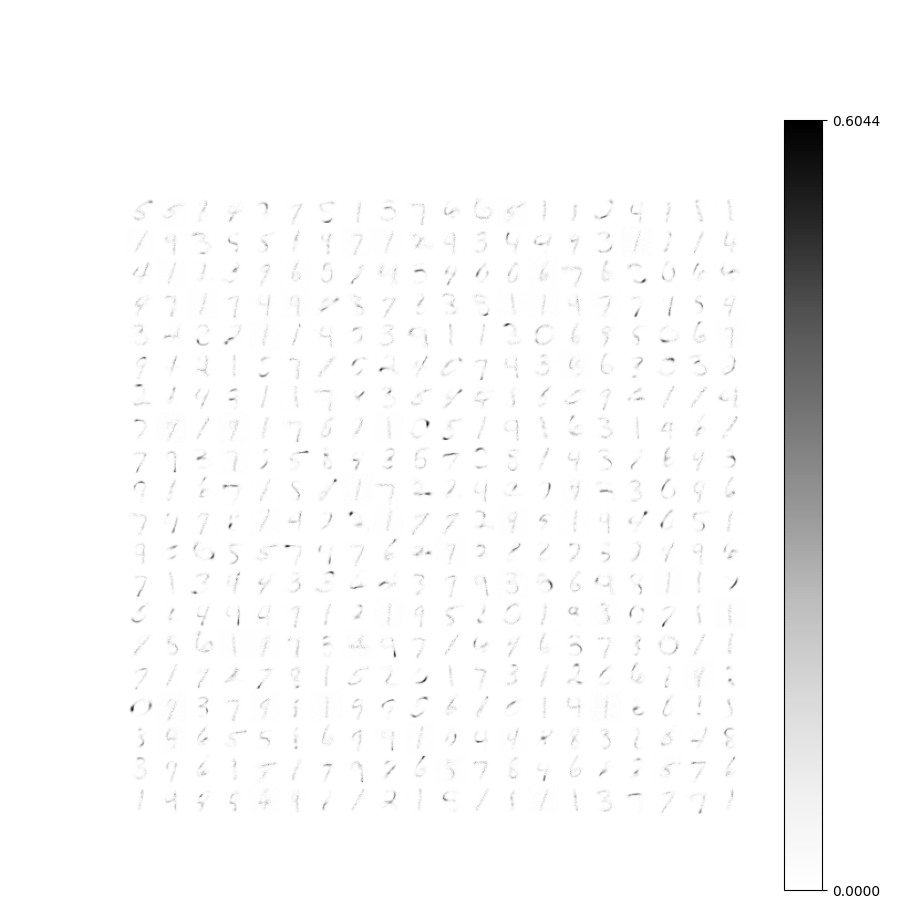

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 211.83it/s]


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 952/1000 [00:04<00:00, 212.57it/s]


KeyboardInterrupt: 

In [2]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))

Nep = 60
T_s = 1000

Kx = 20
Ky = 20
N = Kx * Ky
m_len = 28 * 28 
tr_len = 60000

prec = 1e-10

n_w = 10 #Number of winners

# Feedforward
w = np.random.uniform(0, 1, (N, m_len))
xi = 0.01

for ep in range(Nep):
    inputs = m_flat_tr[np.random.permutation(tr_len)]
    for i in tqdm(range(T_s)):
        v = inputs[i].reshape(-1, 1)
        p = w @ v
        winners = np.argsort(p, axis=0)[-n_w:]
        mask = np.zeros((N, 1))
        mask[winners] = 1
        o = np.minimum(mask * p, 1)
        r = w.T @ o
        mod_r = np.maximum(r, prec)
        e = v - r
        
        w += w * o * (e / mod_r).T * xi
        
    draw_weights(w, Kx, Ky, 28, fig)

In [4]:
def reconstruct(img_i, w, Kx, Ky):
    s_len = 28

    img = m_flat_te[img_i]

    v = img.reshape(-1, 1)
    p = w @ v
    winners = np.argsort(p, axis=0)[-n_w:]
    mask = np.zeros((N, 1))
    mask[winners] = 1
    o = np.minimum(mask * p, 1)
    r = w.T @ o

    plt.figure(figsize=(8, 4))

    plt.subplot(1, 3, 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape(s_len, s_len), cmap="Greys", vmax=1)

    plt.subplot(1, 3, 2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(o.reshape(Ky, Kx), cmap="Greys")

    plt.subplot(1, 3, 3)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(r.reshape(s_len, s_len), cmap="Greys", vmax=1)

    plt.show()

<IPython.core.display.Javascript object>


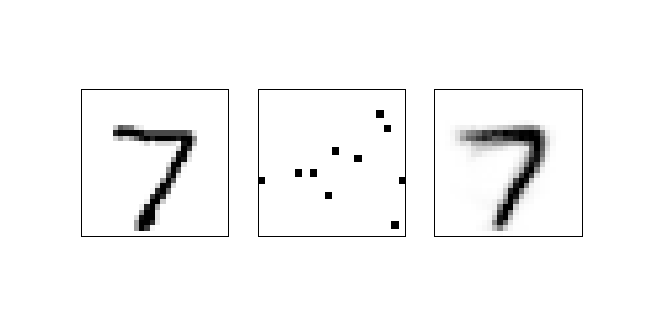

<IPython.core.display.Javascript object>


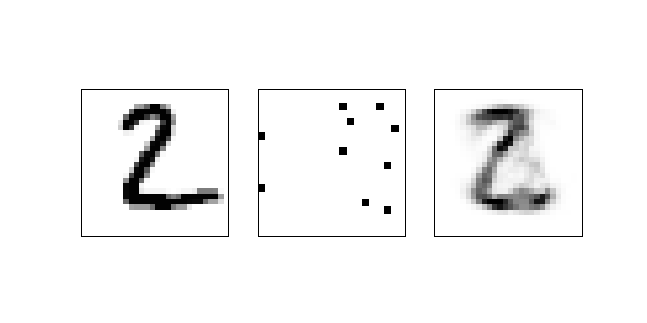

<IPython.core.display.Javascript object>


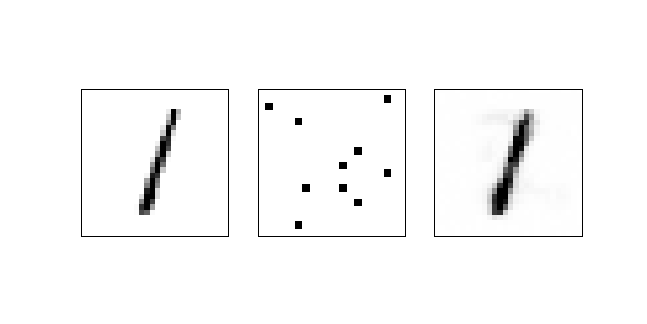

<IPython.core.display.Javascript object>


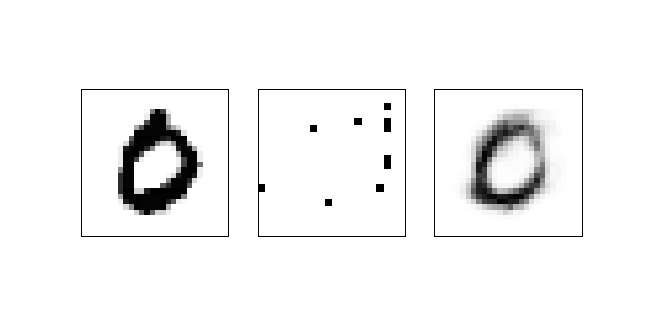

<IPython.core.display.Javascript object>


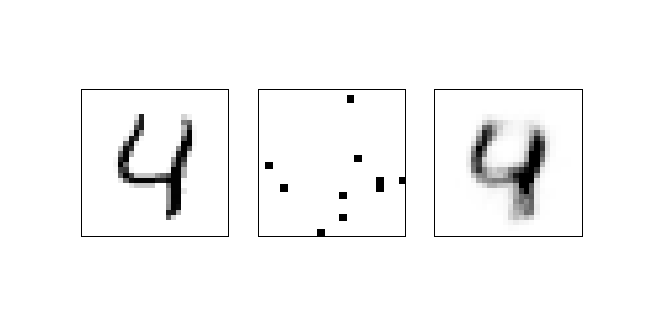

<IPython.core.display.Javascript object>


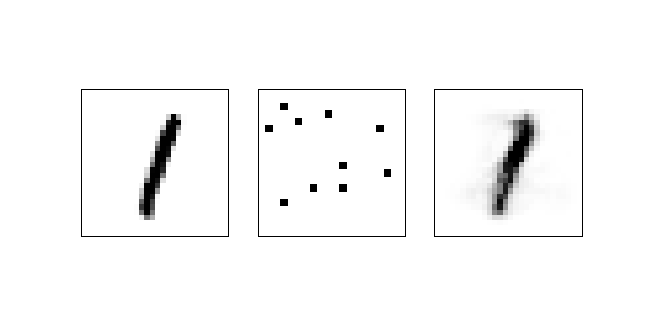

<IPython.core.display.Javascript object>


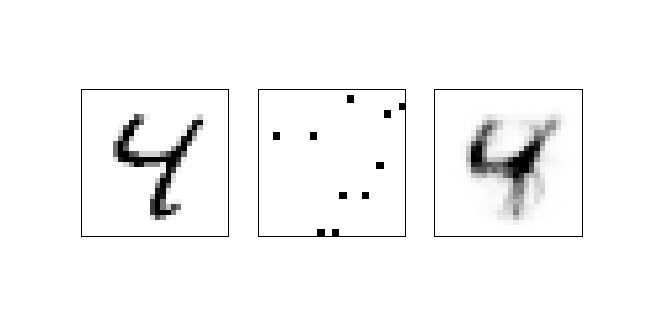

<IPython.core.display.Javascript object>


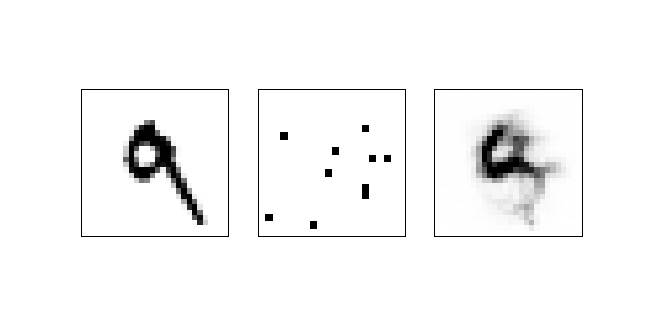

<IPython.core.display.Javascript object>


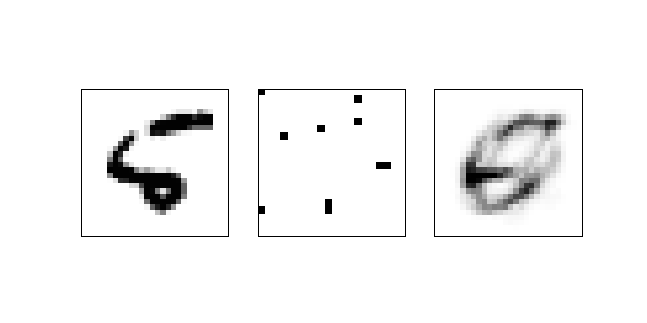

<IPython.core.display.Javascript object>


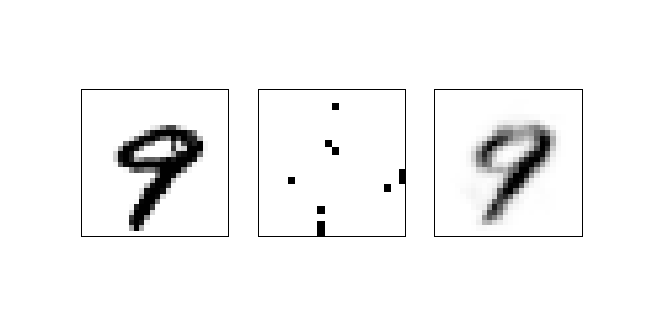

In [6]:
for i in range(10):
    reconstruct(i, w, Kx, Ky)

Hmm, not bad, I guess. I'm going to try fully linear.

<IPython.core.display.Javascript object>


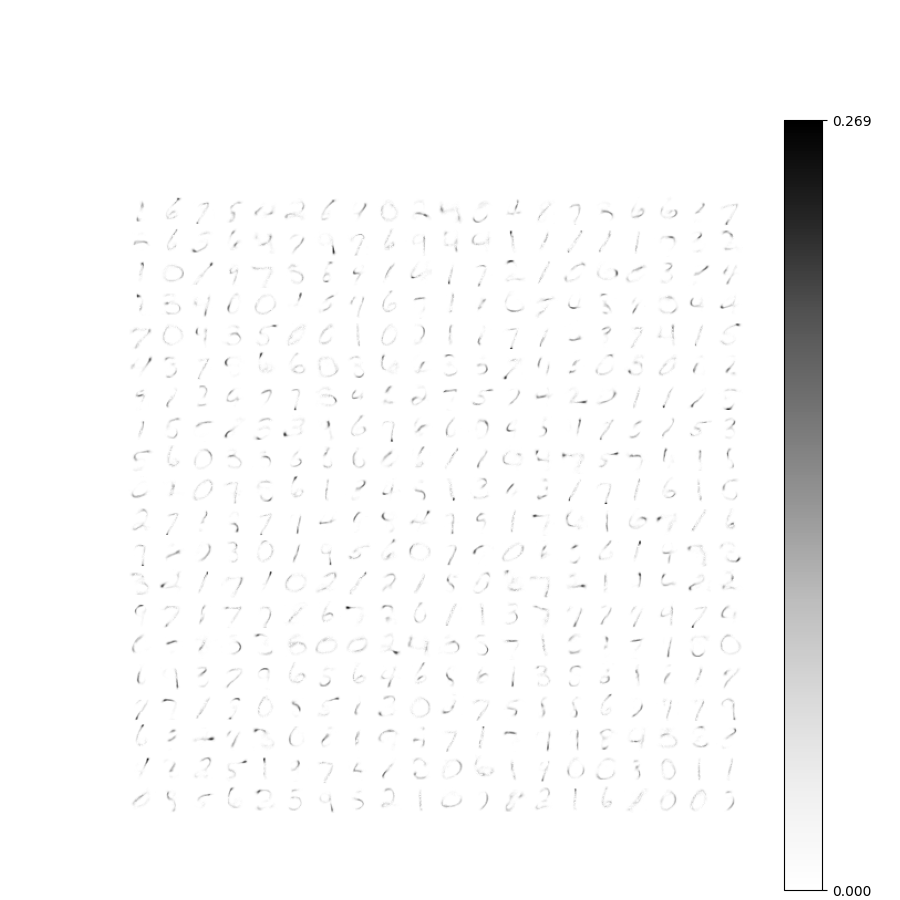

 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 602/1000 [00:02<00:01, 216.34it/s]


KeyboardInterrupt: 

In [9]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))

Nep = 60
T_s = 1000

Kx = 20
Ky = 20
N = Kx * Ky
m_len = 28 * 28 
tr_len = 60000

prec = 1e-10

n_w = 10 #Number of winners

# Feedforward
w = np.random.uniform(0, 1, (N, m_len))
xi = 0.01

for ep in range(Nep):
    inputs = m_flat_tr[np.random.permutation(tr_len)]
    for i in tqdm(range(T_s)):
        v = inputs[i].reshape(-1, 1)
        p = w @ v
        winners = np.argsort(p, axis=0)[-n_w:]
        mask = np.zeros((N, 1))
        mask[winners] = 1
        o = np.minimum(mask * p, 10)
        r = w.T @ o
        mod_r = np.maximum(r, prec)
        e = v - r
        
        w += w * o * (e / mod_r).T * xi
        
    draw_weights(w, Kx, Ky, 28, fig)

In [10]:
def reconstruct(img_i, w, Kx, Ky):
    s_len = 28

    img = m_flat_te[img_i]

    v = img.reshape(-1, 1)
    p = w @ v
    winners = np.argsort(p, axis=0)[-n_w:]
    mask = np.zeros((N, 1))
    mask[winners] = 1
    o = np.minimum(mask * p, 10)
    r = w.T @ o

    plt.figure(figsize=(8, 4))

    plt.subplot(1, 3, 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape(s_len, s_len), cmap="Greys", vmax=1)

    plt.subplot(1, 3, 2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(o.reshape(Ky, Kx), cmap="Greys")

    plt.subplot(1, 3, 3)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(r.reshape(s_len, s_len), cmap="Greys", vmax=1)

    plt.show()

<IPython.core.display.Javascript object>


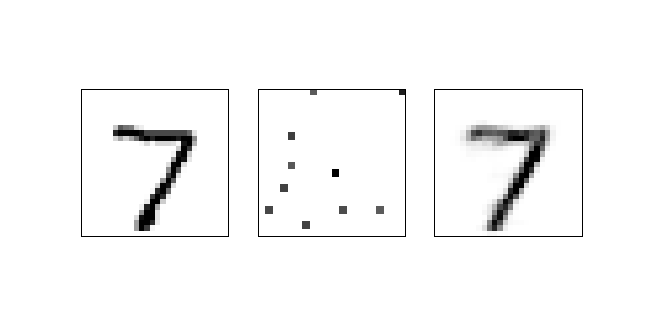

<IPython.core.display.Javascript object>


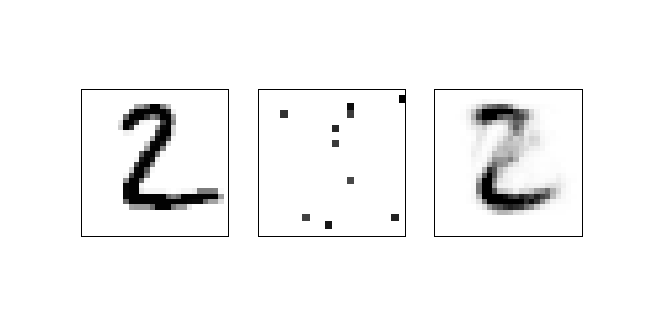

<IPython.core.display.Javascript object>


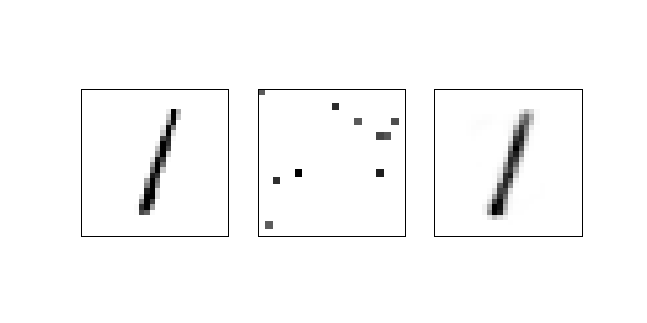

<IPython.core.display.Javascript object>


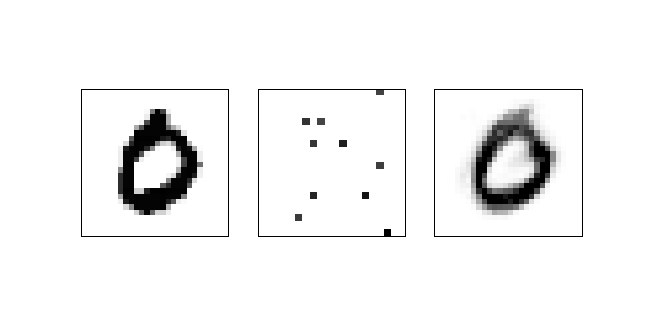

<IPython.core.display.Javascript object>


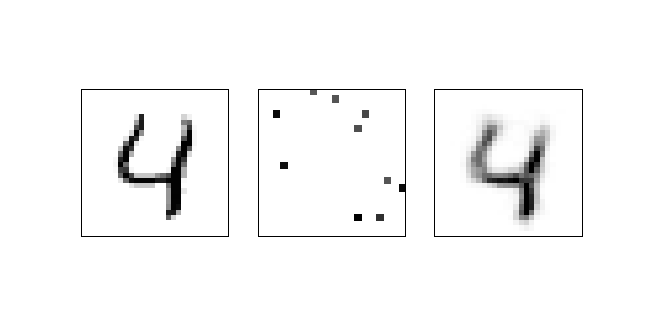

<IPython.core.display.Javascript object>


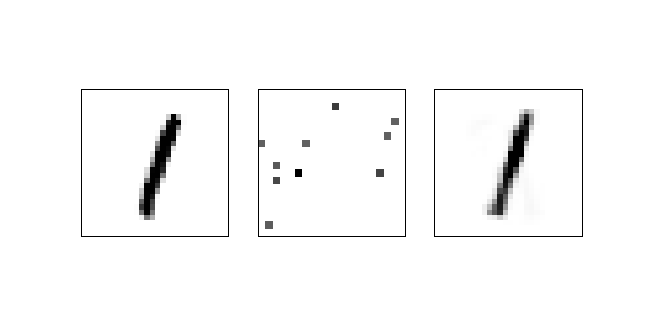

<IPython.core.display.Javascript object>


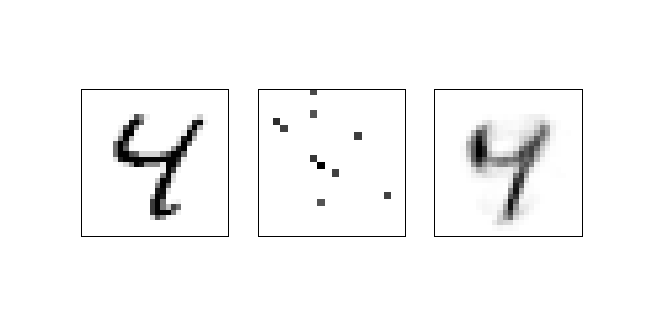

<IPython.core.display.Javascript object>


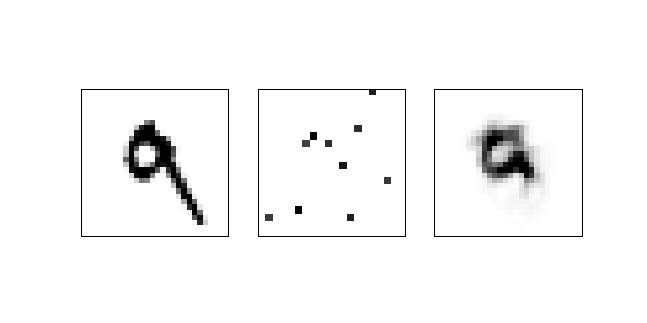

<IPython.core.display.Javascript object>


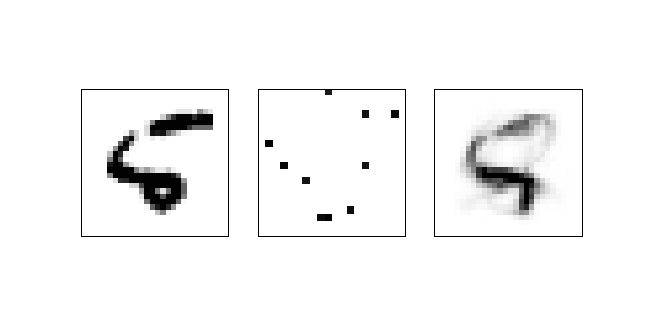

<IPython.core.display.Javascript object>


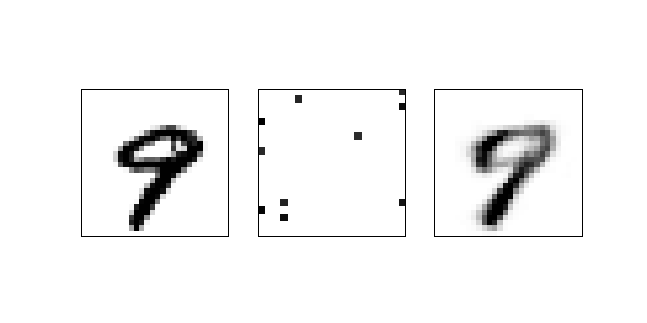

In [11]:
for i in range(10):
    reconstruct(i, w, Kx, Ky)

Dang.  Those reconstructions are pretty darn good.  Ok.  I'm going to mini-batch this.  I don't think it should be particularly difficult.  I just need to remember how I did it last time.

<IPython.core.display.Javascript object>


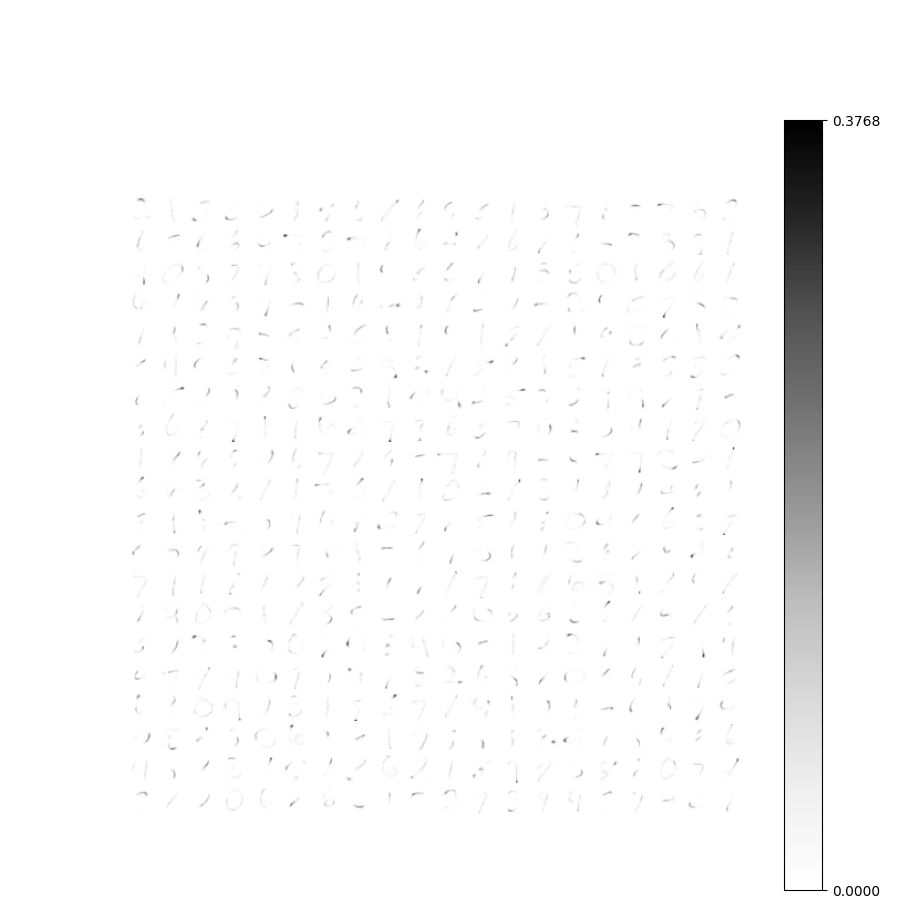

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 210.54it/s]


 29%|████████████████████████████████████████████████▋                                                                                                                       | 290/1000 [00:01<00:03, 205.54it/s]


KeyboardInterrupt: 

In [12]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))

Nep = 60
T_s = 1000

Kx = 20
Ky = 20
N = Kx * Ky
m_len = 28 * 28 
tr_len = 60000

prec = 1e-10

n_w = 15 #Number of winners

# Feedforward
w = np.random.uniform(0, 1, (N, m_len))
xi = 0.01

for ep in range(Nep):
    inputs = m_flat_tr[np.random.permutation(tr_len)]
    for i in tqdm(range(T_s)):
        v = inputs[i].reshape(-1, 1)
        p = w @ v
        winners = np.argsort(p, axis=0)[-n_w:]
        mask = np.zeros((N, 1))
        mask[winners] = 1
        o = np.minimum(mask * p, 10)
        r = w.T @ o
        mod_r = np.maximum(r, prec)
        e = v - r
        
        w += w * o * (e / mod_r).T * xi
        
    draw_weights(w, Kx, Ky, 28, fig)

<IPython.core.display.Javascript object>


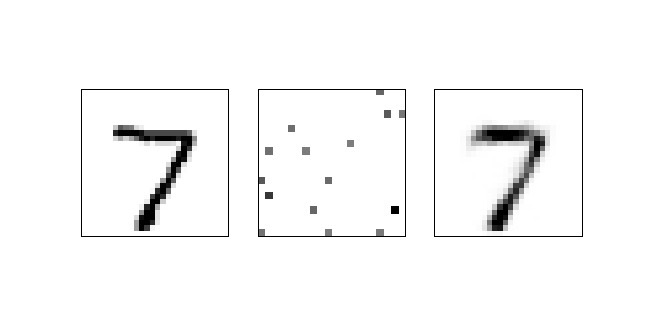

<IPython.core.display.Javascript object>


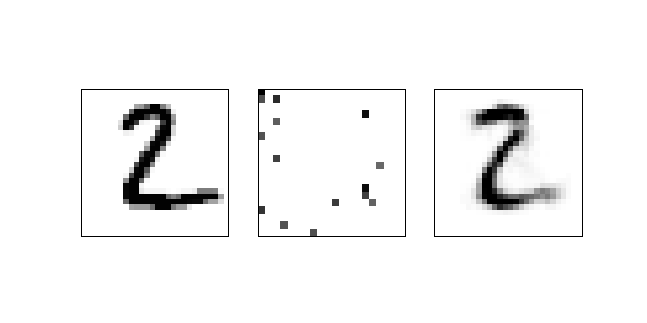

<IPython.core.display.Javascript object>


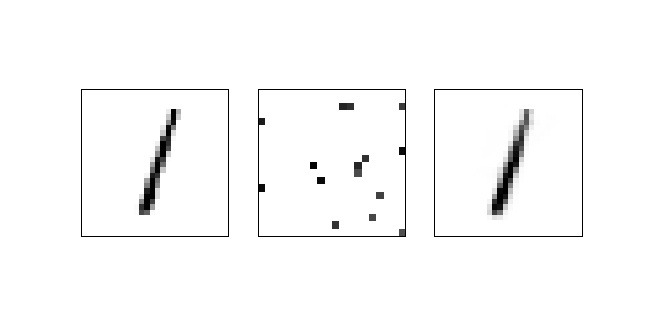

<IPython.core.display.Javascript object>


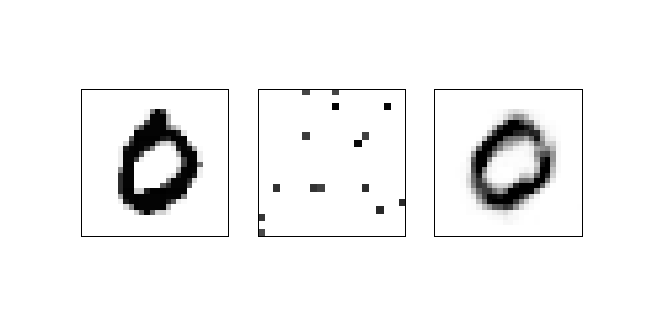

<IPython.core.display.Javascript object>


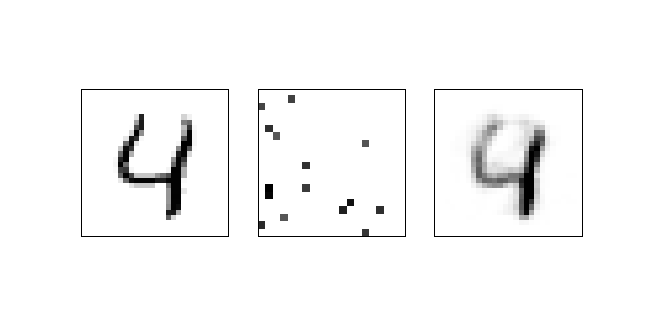

<IPython.core.display.Javascript object>


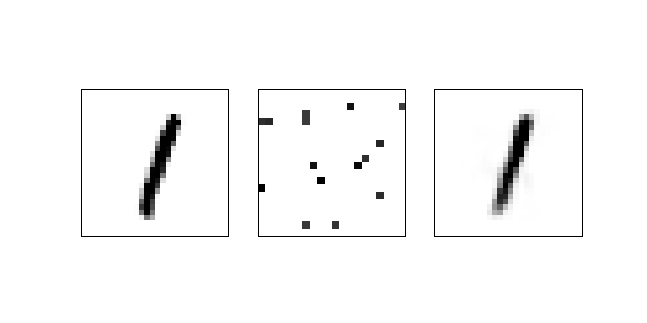

<IPython.core.display.Javascript object>


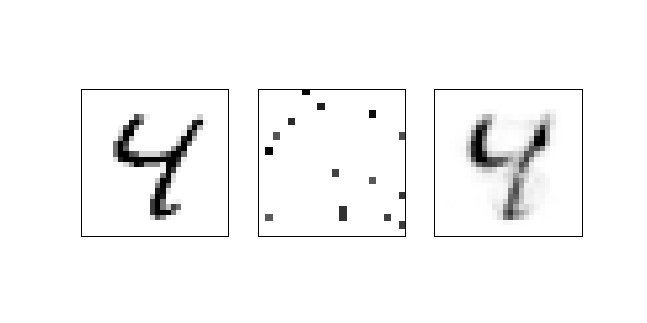

<IPython.core.display.Javascript object>


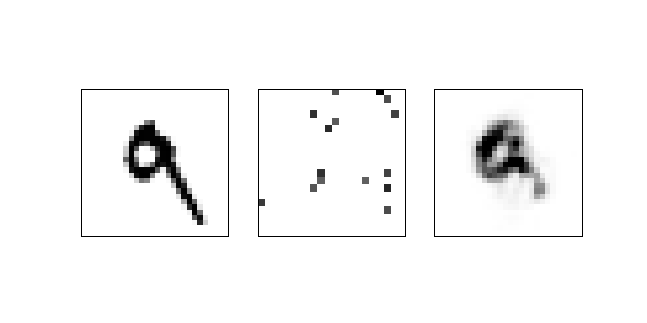

<IPython.core.display.Javascript object>


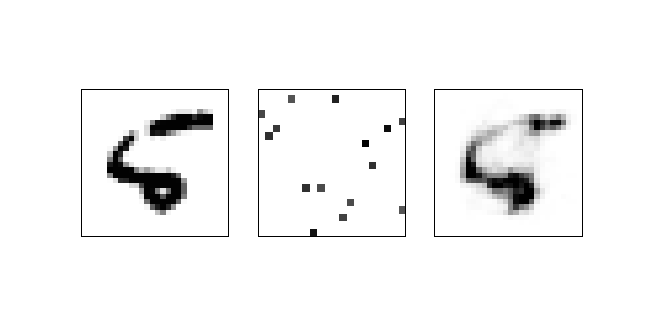

<IPython.core.display.Javascript object>


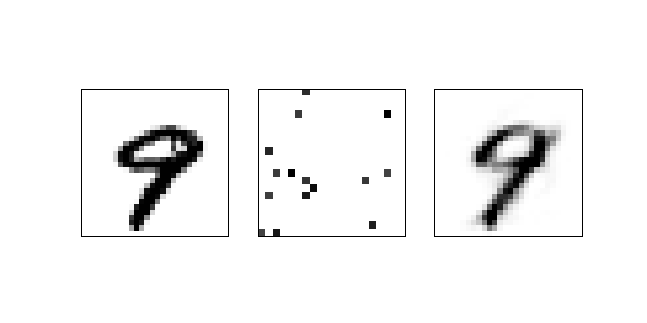

In [13]:
for i in range(10):
    reconstruct(i, w, Kx, Ky)

Ok, batching is actually going to be kinda harder than I thought.  I'm just going to do cifar instead.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tqdm import tqdm
from scipy.special import expit as sig

(tr_x, _), (te_x, _) = cifar10.load_data()

In [15]:
s_len = 10
slh = s_len // 2
sl2 = s_len * s_len

data = tr_x[:, 16 - slh: 16 + slh, 16 - slh: 16 + slh]
flat_data = data.reshape(-1, sl2 * 3) / 255.0
fd_len = flat_data.shape[0]

te_data = te_x[:, 16 - slh: 16 + slh, 16 - slh: 16 + slh]
te_flat_data = te_data.reshape(-1, sl2 * 3) / 255.0

In [16]:
def draw_color_weights(w, Kx, Ky, fig, s_len):
    tapestry = np.zeros((s_len * Kx, s_len * Ky, 3))
    
    w_i = 0
    for y in range(Ky):
        for x in range(Kx):
            tapestry[y * s_len: (y + 1) * s_len, x * s_len: (x + 1) * s_len] = w[w_i].reshape(s_len, s_len, 3)
            w_i += 1
            
    plt.clf()        
    im = plt.imshow(tapestry)
    plt.axis("off")
    fig.canvas.draw()

<IPython.core.display.Javascript object>


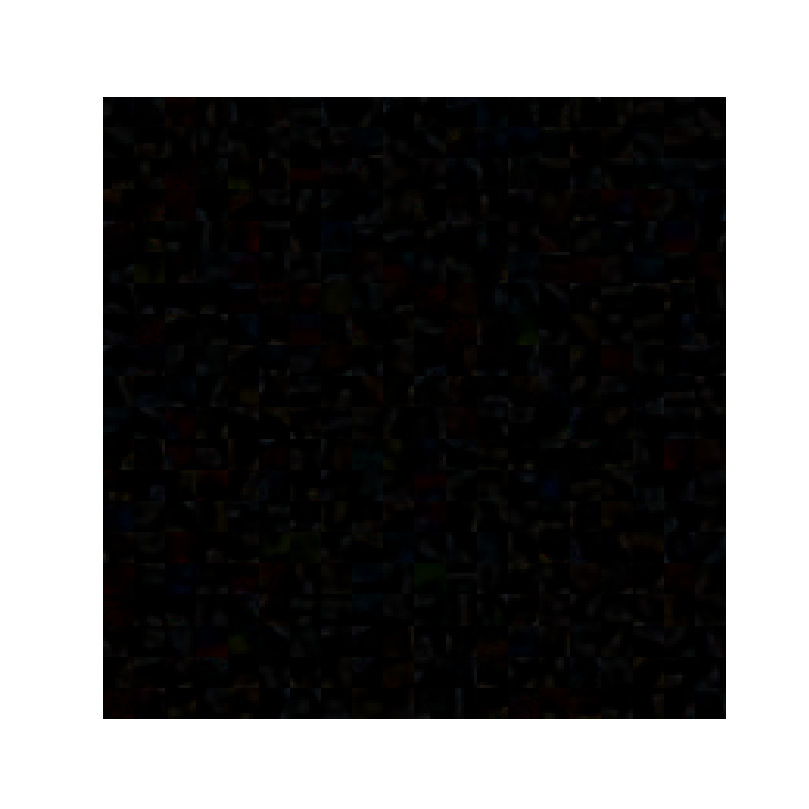

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1821.60it/s]


In [26]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))

Nep = 18
T_s = 10000

Kx = 20
Ky = 20
N = Kx * Ky
m_len = 300 
tr_len = 50000

prec = 1e-10

n_w = 15 #Number of winners

# Feedforward
w = np.random.uniform(0, 1, (N, m_len))
xi = 0.02

for ep in range(Nep):
    inputs = flat_data[np.random.permutation(tr_len)]
    for i in tqdm(range(T_s)):
        v = inputs[i].reshape(-1, 1)
        p = w @ v
        winners = np.argsort(p, axis=0)[-n_w:]
        mask = np.zeros((N, 1))
        mask[winners] = 1
        o = np.minimum(mask * p, 10)
        r = w.T @ o
        mod_r = np.maximum(r, prec)
        e = v - r
        
        w += w * o * (e / mod_r).T * xi
        
    draw_color_weights(w, Kx, Ky, fig, 10)

What strange features.  Let's do reconstructions?

<IPython.core.display.Javascript object>


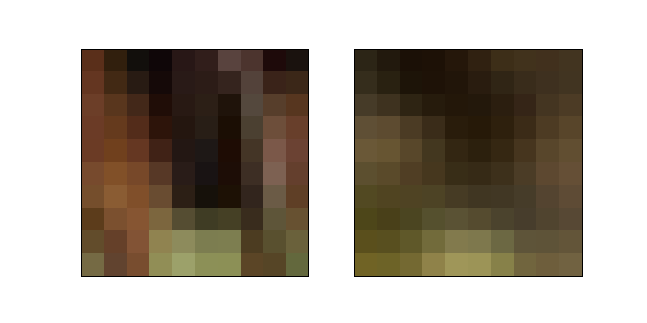

In [36]:
img_i = 435

img = flat_data[img_i]

v = img.reshape(-1, 1)
p = w @ v
winners = np.argsort(p, axis=0)[-n_w:]
mask = np.zeros((N, 1))
mask[winners] = 1
o = np.minimum(mask * p, 10)
r = w.T @ o

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(img.reshape(s_len, s_len, 3))

plt.subplot(1, 2, 2)
plt.xticks([])
plt.yticks([])
plt.imshow(r.reshape(s_len, s_len, 3))

plt.show()

Playing around with the reconstructions shows that they're not particularly great.  It might be a good idea to switch to hsv though?  I'm not sure.

I'm going to train this on 900 neurons, and see what happens.

<IPython.core.display.Javascript object>


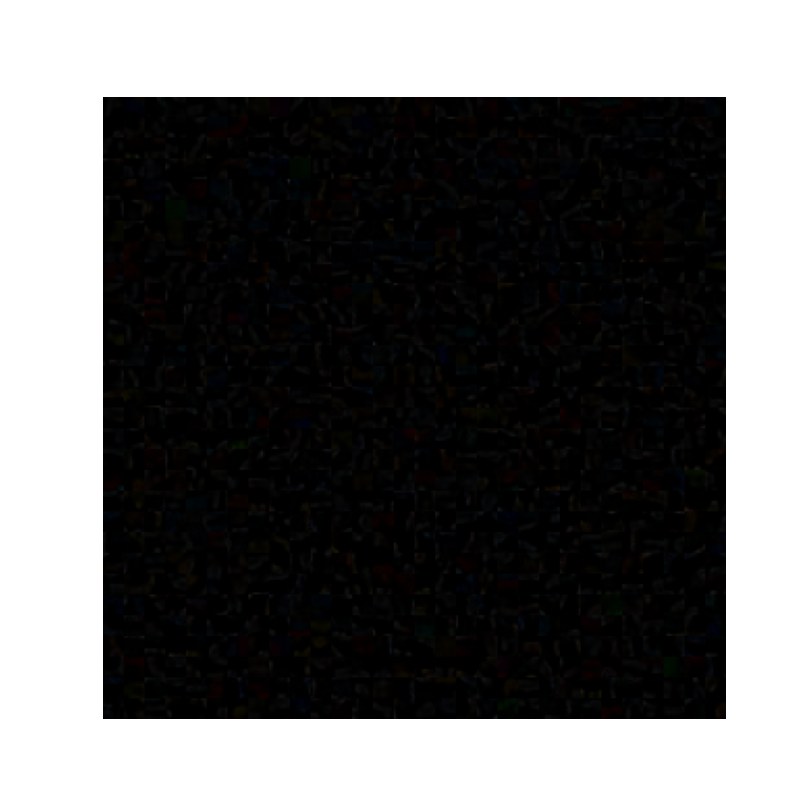

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [03:20<00:00, 248.08it/s]


In [37]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))

Nep = 10
T_s = 50000

Kx = 30
Ky = 30
N = Kx * Ky
m_len = 300 
tr_len = 50000

prec = 1e-10

n_w = 15 #Number of winners

# Feedforward
w = np.random.uniform(0, 1, (N, m_len))
xi = 0.02

for ep in range(Nep):
    inputs = flat_data[np.random.permutation(tr_len)]
    for i in tqdm(range(T_s)):
        v = inputs[i].reshape(-1, 1)
        p = w @ v
        winners = np.argsort(p, axis=0)[-n_w:]
        mask = np.zeros((N, 1))
        mask[winners] = 1
        o = np.minimum(mask * p, 10)
        r = w.T @ o
        mod_r = np.maximum(r, prec)
        e = v - r
        
        w += w * o * (e / mod_r).T * xi
        
    draw_color_weights(w, Kx, Ky, fig, 10)

<IPython.core.display.Javascript object>


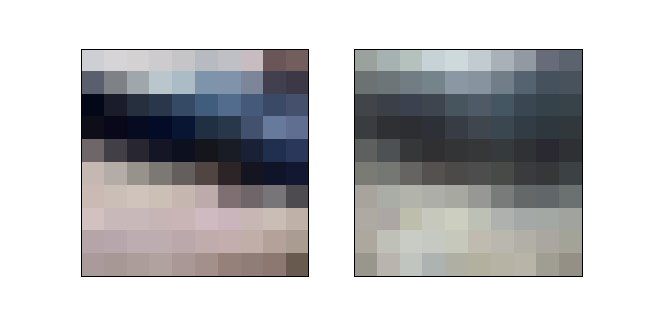

In [44]:
img_i = 441

img = flat_data[img_i]

v = img.reshape(-1, 1)
p = w @ v
winners = np.argsort(p, axis=0)[-n_w:]
mask = np.zeros((N, 1))
mask[winners] = 1
o = np.minimum(mask * p, 10)
r = w.T @ o

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(img.reshape(s_len, s_len, 3))

plt.subplot(1, 2, 2)
plt.xticks([])
plt.yticks([])
plt.imshow(r.reshape(s_len, s_len, 3))

plt.show()

Eh.  Those reconstructions are alright, I guess.  They're not particularly great in terms of hue, I suppose.  

Hmm. I'm really not feeling it right now.  I think I'm going to conclude this one.  Future Danny, feel free to open this bad boi up at some point in the future.

## Conclusions

This is aight, I guess.

## Next Steps

Figure out next steps.